# Backtracking Algorithm: Definition

**Backtracking** is an algorithmic technique that considers searching in every possible combination to solve a computational problem. It is known for solving problems recursively by trying to build a solution incrementally, one piece at a time, removing those solutions that fail to satisfy the constraints of the problem at any point in time.

### Key Characteristics:
* **Recursive Nature:** It naturally fits a recursive structure.
* **Pruning:** It stops exploring a branch (prunes the tree) as soon as it determines that the branch cannot lead to a feasible solution.
* **Global Optimum/All Solutions:** Often used to find all possible configurations (like the N-Queens problem).

### Common Applications:
1.  **Combinatorial Problems:** Permutations, Combinations, Subsets.
2.  **Constraint Satisfaction:** Sudoku, N-Queens, Map Coloring.
3.  **Path Finding:** Solving mazes, Hamiltonian paths.

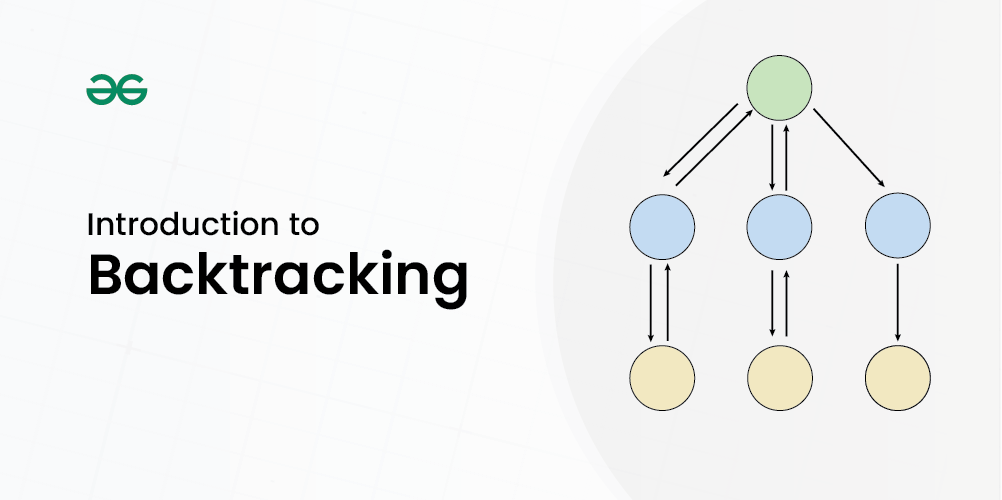

### 📝 Backtracking Master Template

| Component | Purpose |
| :--- | :--- |
| **State** | The current path or partial solution built so far. |
| **Choices** | The set of available candidates at the current step. |
| **Constraints** | Rules that discard invalid candidates (Pruning). |
| **Goal** | The condition that defines a successful solution. |

#### Python Implementation Strategy:
1. **Use a Helper:** Define a nested `backtrack()` function to easily access the `results` list in the outer scope.
2. **Deep Copies:** When appending `current_state` to `results`, always use `results.append(current_state[:])` or `list(current_state)`. Because lists are mutable, if you don't copy it, your final results will be full of empty lists (due to the `.pop()` step).
3. **Pruning:** The earlier you check `is_valid`, the faster your algorithm runs. This is what differentiates $O(2^n)$ from a manageable runtime.

In [1]:
def solve_problem(input_data):
    results = []
    
    def backtrack(current_state, options):
        # 1. BASE CASE / GOAL
        # Check if the current state satisfies the solution criteria
        if is_solution(current_state):
            results.append(list(current_state)) # Use list() to create a deep copy
            return

        # 2. ITERATE OVER CHOICES
        for choice in options:
            # 3. CONSTRAINT CHECK (Pruning)
            # Only proceed if the choice is valid according to problem rules
            if is_valid(choice, current_state):
                
                # 4. MAKE THE CHOICE (Update State)
                current_state.append(choice)
                
                # 5. EXPLORE (Recurse)
                # Pass the updated state to the next level
                backtrack(current_state, options)
                
                # 6. UNDO THE CHOICE (The actual "Backtrack")
                # Remove the choice to reset the state for the next iteration
                current_state.pop()

    backtrack([], input_data)
    return results

In [2]:
def get_subsets(nums):
    results = []
    
    def backtrack(start_index, current_path):
        # 1. GOAL: In subsets, every partial path is a valid subset
        # We make a copy of current_path because it's modified later
        results.append(list(current_path))
        
        # 2. CHOICES: Iterate through the remaining numbers
        for i in range(start_index, len(nums)):
            
            # 3. CHOOSE: Add the current number to our path
            current_path.append(nums[i])
            
            # 4. EXPLORE: Recurse to the next index
            # Notice we pass 'i + 1' so we don't reuse the same element
            backtrack(i + 1, current_path)
            
            # 5. BACKTRACK: Remove the number to try the next one
            current_path.pop()

    # Start the recursion from index 0 with an empty path
    backtrack(0, [])
    return results

# Example Execution
my_nums = [1, 2, 3]
print(f"Subsets of {my_nums}: {get_subsets(my_nums)}")

Subsets of [1, 2, 3]: [[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]
